In [2]:
#make_barplots_for_hypergeometric_test_results
#
#Fetch information from files, then make barplots

import pandas as pd
import seaborn as sns
import matplotlib as mpl 
import math
mpl.rcParams['pdf.fonttype'] = 42

In [16]:
data_dir = '/Users/m221138/RA_acpa_multiomics/analysis/correlation_network/network_similarity_v3/gse'
condition_list = ['neg','pos']

result_df = pd.DataFrame(columns= ["data_type", "GO Term","-logpvalue"])


for condition in condition_list:
    data_type = "ACPA-neg.%s" % condition
    data_file = '%s/GSE.acpa_neg.protein.correlation.%s.clean.txt' % (data_dir,condition)
    print (data_file)
    data_df = pd.read_csv(data_file, sep="\t")
    r, c = data_df.shape

    for i in range(r):
        pathway = data_df["Term"][i]
        pval = float(data_df["PValue"][i])
        category = data_df["Category"][i]
        if category == "GOTERM_BP_FAT":
            if pval < 0.01:
                new_pval = -math.log(pval)
                result_df = result_df.append({"data_type": data_type, "GO Term": pathway,"-logpvalue": new_pval}, ignore_index = True)

#             result_df.sort_values('pathway')
            
            

/Users/m221138/RA_acpa_multiomics/analysis/correlation_network/network_similarity_v3/gse/GSE.acpa_neg.protein.correlation.neg.clean.txt
/Users/m221138/RA_acpa_multiomics/analysis/correlation_network/network_similarity_v3/gse/GSE.acpa_neg.protein.correlation.pos.clean.txt


In [17]:
result_df = result_df.sort_values('GO Term')
result_df

,data_type,GO Term,-logpvalue
25,ACPA-neg.pos,GO:0002252~immune effector process,5.137892
24,ACPA-neg.pos,GO:0002449~lymphocyte mediated immunity,5.166663
21,ACPA-neg.pos,GO:0002455~humoral immune response mediated by...,5.887148
17,ACPA-neg.pos,GO:0002673~regulation of acute inflammatory re...,5.655530
0,ACPA-neg.neg,GO:0002682~regulation of immune system process,5.380175
4,ACPA-neg.pos,GO:0002682~regulation of immune system process,6.897948
27,ACPA-neg.pos,GO:0002706~regulation of lymphocyte mediated i...,4.996988
20,ACPA-neg.pos,GO:0002920~regulation of humoral immune response,6.860844
23,ACPA-neg.pos,GO:0002922~positive regulation of humoral immu...,5.415814
22,ACPA-neg.pos,GO:0002923~regulation of humoral immune respon...,5.881088


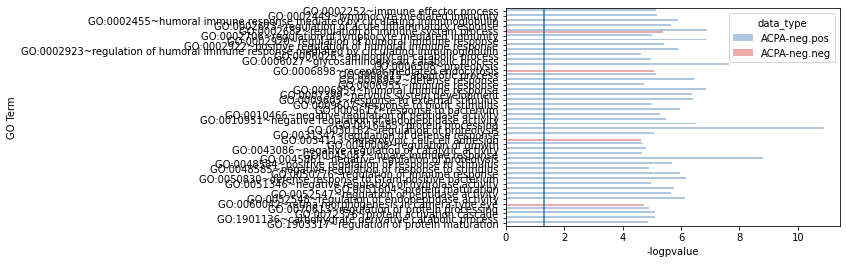

In [18]:
# my_palette = ['#1026a6','#A7C7E7','#841f27', '#FAA0A0']
my_palette = ['#A7C7E7', '#FAA0A0']
result_plot = sns.barplot(x="-logpvalue", y="GO Term", hue="data_type", palette=my_palette, data=result_df)
result_plot.axvline(1.30103)
output_pdf = "/Users/m221138/RA_acpa_multiomics/analysis/correlation_network/network_similarity_v3/gse/GSE.proteomics.correlation.pdf"

result_plot.figure.savefig(output_pdf)